## Encounter ID (encounter_id): Unique identifier of an encounter

Patient Number (patient_number): Unique identifier of a patient

Race (race): Values: Caucasian, Asian, African American, Hispanic, and other

Gender (gender): Values: male, female, and unknown/invalid

Age (age): Grouped in 10-year intervals: [0,10),[10,20),..., [90,100)

Weight (weight): Weight in pounds

Admission Type (admission_type): Integer identifier corresponding to 9 distinct values, e.g., emergency, urgent, elective, newborn, and not available

Discharge Disposition (discharge_disposition): Integer identifier corresponding to 29 distinct values, e.g., discharged to home, expired, and not available

Admission Source (admission_source): Integer identifier corresponding to 21 distinct values, e.g., physician referral, emergency room, and hospital transfer

Time in Hospital (days_in_hospital): Integer number of days between admission and discharge

Payer Code (payer_code): Integer identifier corresponding to 23 distinct values, e.g., Blue Cross/Blue Shield, Medicare, and self-pay

Medical Specialty (medical_specialty): Integer identifier of admitting physician's specialty, corresponding to 84 distinct values, e.g., cardiology, internal medicine, family/general practice, and surgeon

Number of Lab Procedures (number_of_lab_procedures): Number of lab tests performed during the encounter

Number of Procedures (number_of_procedures): Number of procedures (other than lab tests) performed during the encounter

Number of Medications (number_of_medications): Number of distinct generic names administered during the encounter

Number of Outpatient Visits (outpatient_visits_previous_year): Number of patient's outpatient visits in the year preceding the encounter

Number of Emergency Visits (emergency_visits_previous_year): Number of patient's emergency visits in the year preceding the encounter

Number of Inpatient Visits (inpatient_visits_previous_year): Number of patient's inpatient visits in the year preceding the encounter

Diagnosis 1 (diagnosis_1): The primary diagnosis (coded as the first three digits of ICD9); 848 distinct values

Diagnosis 2 (diagnosis_2): Secondary diagnosis (coded as the first three digits of ICD9); 923 distinct values

Diagnosis 3 (diagnosis_3): Additional secondary diagnosis (coded as the first three digits of ICD9); 954 distinct values

Number of Diagnoses (number_of_diagnoses): Number of diagnoses entered to the system

Serum Glucose Test Result (serum_glucose_test): Indicates the range of the result or if the test was not performed. Values: ">200," ">300," "normal," and "none" if not measured

A1c Test Result (a1c_test): ">8" if the result was greater than 8%, ">7" if the result was greater than 7% but less than 8%, "normal" if the result was less than 7% and "none" if not measured.

Change of Diabetes Medication (change_of_diabetes_medication): Indicates if there was a change in diabetic medications (either dosage or generic name). Values: "change" and "no change"

Diabetes Medication Prescribed (prescribed_diabetes_medication): Indicates if any diabetes medication was prescribed. Values: "yes" and "no"

24 attributes for medications: For generic names: metformin, repaglinide, nateglinide, chlorpropamide, glimepiride, acetohexamide, glipizide, glyburide, tolbutamide, pioglitazone, rosiglitazone, acarbose, miglitol, troglitazone, tolazamide, examide, sitagliptin, insulin, glyburide-metformin, glipizide-metformin, glimepiride-pioglitazone, metformin-rosiglitazone, and metformin-pioglitazone, the feature indicates whether the drug was prescribed or there was a change in dosage. Values: "up" if the dosage was increased during the encounter, "down" if the dosage was decreased, "steady" if the dosage did not change, and "no" if the drug was not prescribed

Readmitted (readmitted): Days until patient's readmission. Values: "<30" if the patient was readmitted in less than 30 days, ">30" if the patient was readmitted in more than 30 days, and "No" for no record of readmission.


In [1]:
#importing essential libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
import plotly.express as px
import plotly.io as pio
import plotly.tools as tls
import plotly.offline as py 
warnings.filterwarnings("ignore")

In [2]:
import plotly.graph_objects as go

In [3]:
df= pd.read_csv("diabetic_data.csv")
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [4]:
df.tail()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
101761,443847548,100162476,AfricanAmerican,Male,[70-80),?,1,3,7,3,MC,?,51,0,16,0,0,0,250.13,291,458,9,NaN,>8,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Down,No,No,No,No,No,Ch,Yes,>30
101762,443847782,74694222,AfricanAmerican,Female,[80-90),?,1,4,5,5,MC,?,33,3,18,0,0,1,560,276,787,9,NaN,NaN,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,Yes,NO
101763,443854148,41088789,Caucasian,Male,[70-80),?,1,1,7,1,MC,?,53,0,9,1,0,0,38,590,296,13,NaN,NaN,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Down,No,No,No,No,No,Ch,Yes,NO
101764,443857166,31693671,Caucasian,Female,[80-90),?,2,3,7,10,MC,Surgery-General,45,2,21,0,0,1,996,285,998,9,NaN,NaN,No,No,No,No,No,No,Steady,No,No,Steady,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO
101765,443867222,175429310,Caucasian,Male,[70-80),?,1,1,7,6,?,?,13,3,3,0,0,0,530,530,787,9,NaN,NaN,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO


In [5]:
df.columns

Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age', 'weight',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'payer_code', 'medical_specialty',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')

In [6]:
df.dtypes

encounter_id                 int64
patient_nbr                  int64
race                        object
gender                      object
age                         object
weight                      object
admission_type_id            int64
discharge_disposition_id     int64
admission_source_id          int64
time_in_hospital             int64
payer_code                  object
medical_specialty           object
num_lab_procedures           int64
num_procedures               int64
num_medications              int64
number_outpatient            int64
number_emergency             int64
number_inpatient             int64
diag_1                      object
diag_2                      object
diag_3                      object
number_diagnoses             int64
max_glu_serum               object
A1Cresult                   object
metformin                   object
repaglinide                 object
nateglinide                 object
chlorpropamide              object
glimepiride         

In [7]:
df.isnull().sum()

encounter_id                    0
patient_nbr                     0
race                            0
gender                          0
age                             0
weight                          0
admission_type_id               0
discharge_disposition_id        0
admission_source_id             0
time_in_hospital                0
payer_code                      0
medical_specialty               0
num_lab_procedures              0
num_procedures                  0
num_medications                 0
number_outpatient               0
number_emergency                0
number_inpatient                0
diag_1                          0
diag_2                          0
diag_3                          0
number_diagnoses                0
max_glu_serum               96420
A1Cresult                   84748
metformin                       0
repaglinide                     0
nateglinide                     0
chlorpropamide                  0
glimepiride                     0
acetohexamide 

In [8]:
df.describe([0.10,0.25,0.50,0.75,0.90,0.95,0.99]).T

,count,mean,std,min,10%,25%,50%,75%,90%,95%,99%,max
encounter_id,101766.0,1.652016e+08,1.026403e+08,12522.0,43368426.0,84961194.0,152388987.0,2.302709e+08,311346359.0,378962843.0,430219329.2,443867222.0
patient_nbr,101766.0,5.433040e+07,3.869636e+07,135.0,3957115.5,23413221.0,45505143.0,8.754595e+07,103287825.0,111480273.0,160818198.8,189502619.0
admission_type_id,101766.0,2.024006e+00,1.445403e+00,1.0,1.0,1.0,1.0,3.000000e+00,5.0,6.0,6.0,8.0
discharge_disposition_id,101766.0,3.715642e+00,5.280166e+00,1.0,1.0,1.0,1.0,4.000000e+00,7.0,18.0,25.0,28.0
admission_source_id,101766.0,5.754437e+00,4.064081e+00,1.0,1.0,1.0,7.0,7.000000e+00,7.0,17.0,17.0,25.0
time_in_hospital,101766.0,4.395987e+00,2.985108e+00,1.0,1.0,2.0,4.0,6.000000e+00,9.0,11.0,14.0,14.0
num_lab_procedures,101766.0,4.309564e+01,1.967436e+01,1.0,14.0,31.0,44.0,5.700000e+01,67.0,73.0,85.0,132.0
num_procedures,101766.0,1.339730e+00,1.705807e+00,0.0,0.0,0.0,1.0,2.000000e+00,4.0,5.0,6.0,6.0
num_medications,101766.0,1.602184e+01,8.127566e+00,1.0,7.0,10.0,15.0,2.000000e+01,26.0,31.0,43.0,81.0
number_outpatient,101766.0,3.693572e-01,1.267265e+00,0.0,0.0,0.0,0.0,0.000000e+00,1.0,2.0,5.0,42.0


In [9]:
# Map out age groups 
age_id = {'[0-10)':0,
          '[10-20)':10,
          '[20-30)':20,
          '[30-40)':30,
          '[40-50)':40,
          '[50-60)':50,
          '[60-70)':60,
          '[70-80)':70,
          '[80-90)':80,
          '[90-100)':90}

df['age_group'] = df.age.replace(age_id)

In [10]:
df.groupby('readmitted').size()

readmitted
<30    11357
>30    35545
NO     54864
dtype: int64

In [11]:
df = df.loc[~df.discharge_disposition_id.isin([11,13,14,19,20,21])]

In [12]:
df['OUTPUT_LABEL'] = (df.readmitted == '<30').astype('int')

In [13]:
diabetes_map = {'Yes': 1, 'No': 0}
df['diabetesMed'] = df['diabetesMed'].map(diabetes_map)


In [14]:
df.head(5)


,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,age_group,OUTPUT_LABEL
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,?,Pediatrics-Endocrinology,41,0,1,0,0,0,250.83,?,?,1,NaN,NaN,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,0,NO,0,0
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,?,?,59,0,18,0,0,0,276,250.01,255,9,NaN,NaN,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,1,>30,10,0
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,?,?,11,5,13,2,0,1,648,250,V27,6,NaN,NaN,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,1,NO,20,0
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,?,?,44,1,16,0,0,0,8,250.43,403,7,NaN,NaN,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,1,NO,30,0
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,?,?,51,0,8,0,0,0,197,157,250,5,NaN,NaN,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,1,NO,40,0


In [15]:
df['weight'].unique()

array(['?', '[75-100)', '[50-75)', '[0-25)', '[100-125)', '[25-50)',
       '[125-150)', '[175-200)', '[150-175)', '>200'], dtype=object)

In [16]:
weight_id = {
    '0': 0,
    '[75-100)': 75,
    '[50-75)': 50,
    '[0-25)': 0,
    '[100-125)': 100,
    '[25-50)': 25,
    '[125-150)': 125,
    '[175-200)': 175,
    '[150-175)': 150,
    '>200': 200
}

df['weight_group'] = df['weight'].replace(weight_id)

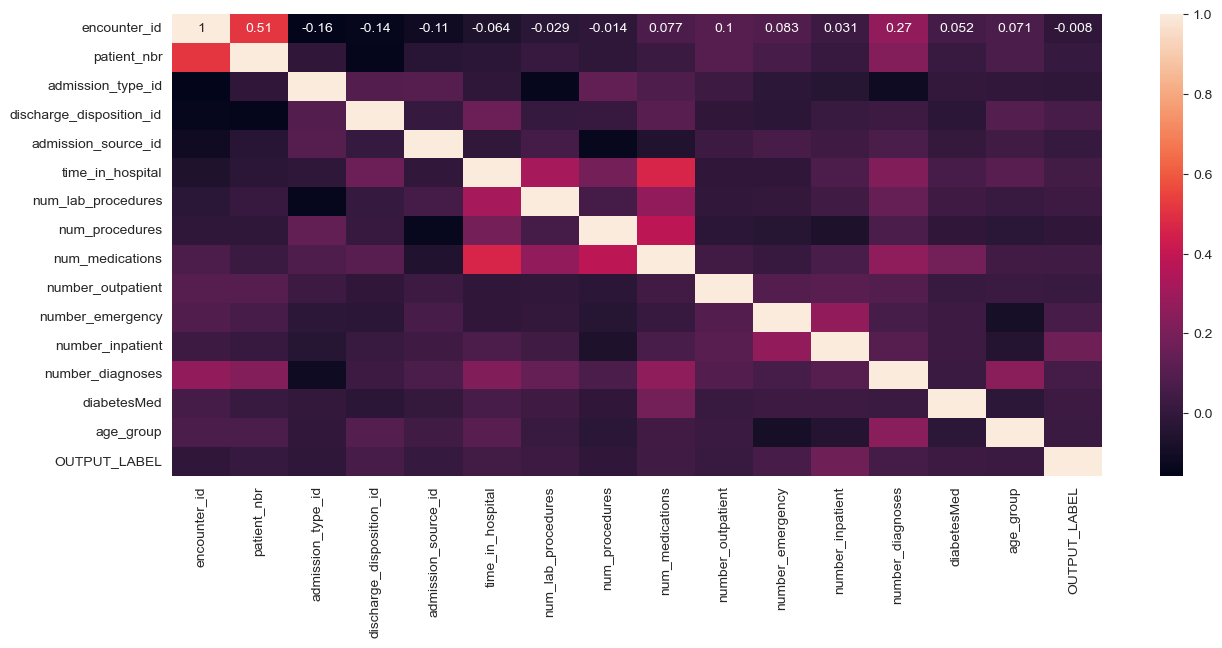

In [17]:
numeric_df = df.select_dtypes(include=[np.number])  # This selects only numeric columns
correlation_matrix = numeric_df.corr()

plt.figure(figsize=(15, 6))
sns.set_style("darkgrid")
sns.heatmap(correlation_matrix, annot=True)
plt.show()

In [18]:
import pandas as pd

# Assuming 'df' is your pandas DataFrame and it's already been defined

# Define the values to be counted as missing
missing_values = ["?", "Unknown/Invalid"]

# Initialize a dictionary to hold the counts of missing values for each column
missing_count = {}

# Count the missing values and replace them with NaN
for column in df.columns:
    if df[column].dtype == 'object':  # This checks for text columns, similar to is.factor in R
        # Count the number of missing values in this column
        count = (df[column].isin(missing_values)).sum()
        if count > 0:
            missing_count[column] = count
        # Replace '?' and 'Unknown/Invalid' with NaN
        df[column] = df[column].replace(missing_values, pd.NA)

# Print the columns and their respective counts of missing values
for column, count in missing_count.items():
    print(f"{column}: {count}")


race: 2234
gender: 3
weight: 96218
payer_code: 39398
medical_specialty: 48616
diag_1: 20
diag_2: 356
diag_3: 1419
weight_group: 96218


In [19]:
df.to_csv('hospData_NA.csv', index=False)

In [20]:
import pandas as pd

# Read the CSV file into a DataFrame
hospD = pd.read_csv("hospData_NA.csv")

# Drop the 'X' column from the DataFrame
# Drop the 'X' column from the DataFrame if it exists
if 'X' in hospD.columns:
    hospD.drop('X', axis=1, inplace=True)



In [21]:
# Delete the specified columns
hospD = hospD.drop(['weight', 'payer_code', 'medical_specialty'], axis=1)

# Get the dimensions of the DataFrame
dimensions = hospD.shape
print(dimensions)


(99343, 50)


In [22]:
# Delete the specified columns
hospD = hospD.drop(['encounter_id', 'diag_2', 'diag_3'], axis=1)

# Get the dimensions of the DataFrame
dimensions = hospD.shape
print(dimensions)


(99343, 47)


In [23]:
# Delete the specified columns
hospD = hospD.drop(['examide', 'citoglipton'], axis=1)

# Get the dimensions of the DataFrame
dimensions = hospD.shape
print(dimensions)


(99343, 45)


In [24]:
# Remove rows with missing values in the specified columns
hospD = hospD.dropna(subset=['race', 'gender', 'diag_1'])

# Get the dimensions of the DataFrame
dimensions = hospD.shape
print(dimensions)


(97090, 45)


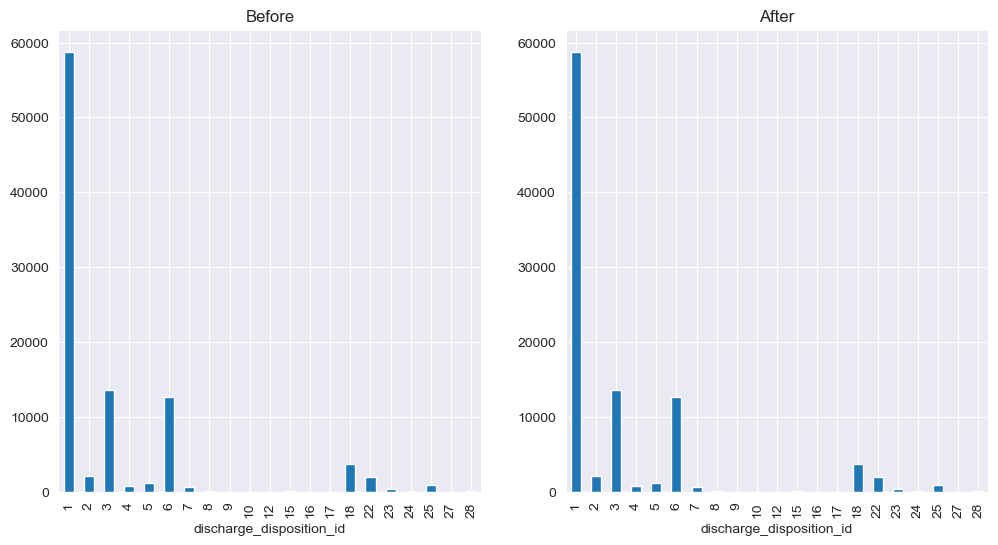

In [25]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'hospD' is your pandas DataFrame and it's already been defined

# Set up a 1x2 subplot
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Bar plot before removal
hospD['discharge_disposition_id'].value_counts().sort_index().plot(kind='bar', ax=axs[0], title="Before")

# Remove specified 'discharge_disposition_id' values
hospD = hospD[~hospD['discharge_disposition_id'].isin([11, 13, 14, 19, 20, 21])]

# Bar plot after removal
hospD['discharge_disposition_id'].value_counts().sort_index().plot(kind='bar', ax=axs[1], title="After")

# Display the plots
plt.show()


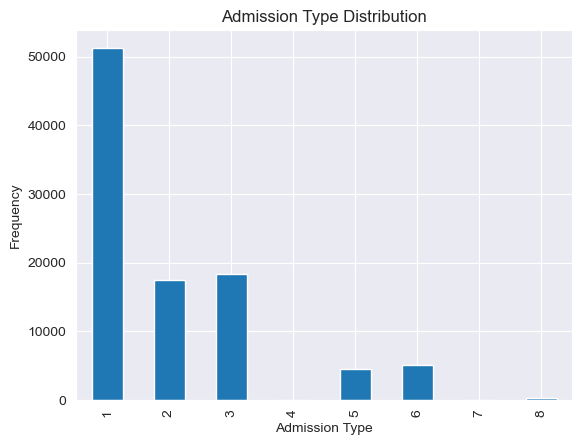

In [26]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'hospD' is your pandas DataFrame and it's already been defined

# Rename the column 'admission_type_id' to 'admission_type'
hospD.rename(columns={'admission_type_id': 'admission_type'}, inplace=True)

# Plot the distribution of 'admission_type' values as a bar plot
hospD['admission_type'].value_counts().sort_index().plot(kind='bar', title='Admission Type Distribution')

# Display the plot
plt.xlabel('Admission Type')
plt.ylabel('Frequency')
plt.show()



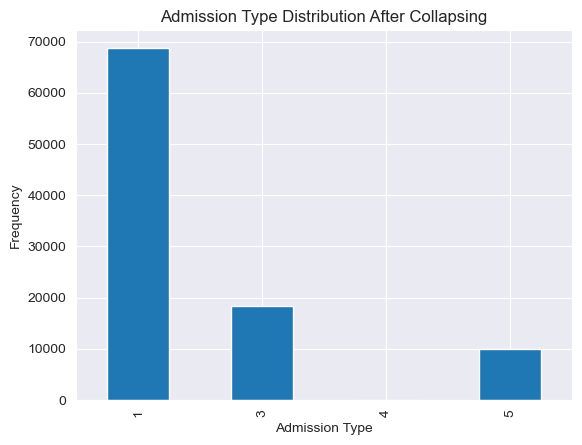

In [27]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'hospD' is your pandas DataFrame and it's already been defined

# Collapsing values in 'admission_type'
hospD['admission_type'] = hospD['admission_type'].replace({2: 1, 7: 1, 6: 5, 8: 5})

# Plot the distribution of 'admission_type' values as a bar plot
hospD['admission_type'].value_counts().sort_index().plot(kind='bar', title='Admission Type Distribution After Collapsing')

# Display the plot
plt.xlabel('Admission Type')
plt.ylabel('Frequency')
plt.show()


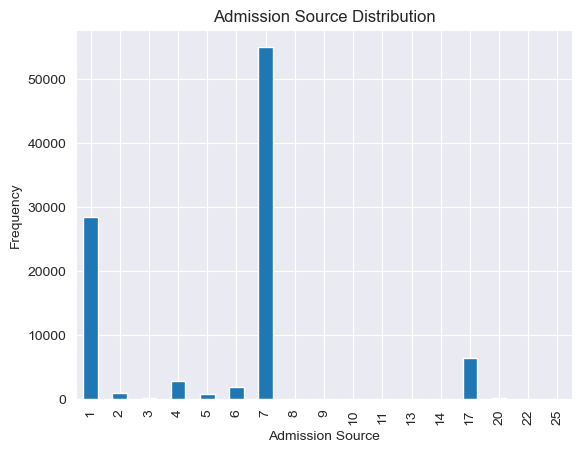

In [28]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'hospD' is your pandas DataFrame and it's already been defined

# Rename the column 'admission_source_id' to 'admission_source'
hospD.rename(columns={'admission_source_id': 'admission_source'}, inplace=True)

# Plot the distribution of 'admission_source' values as a bar plot
hospD['admission_source'].value_counts().sort_index().plot(kind='bar', title='Admission Source Distribution')

# Customize the plot
plt.xlabel('Admission Source')
plt.ylabel('Frequency')
plt.show()


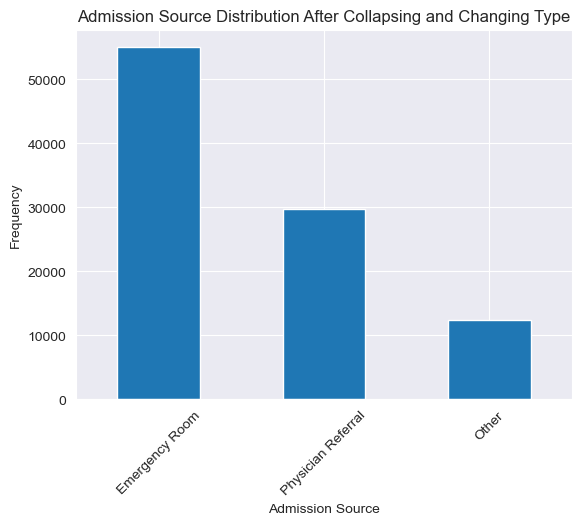

In [29]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'hospD' is your pandas DataFrame and it's already been defined

# Define a mapping function for collapsing and renaming the admission_source values
def map_admission_source(source):
    if source in [1, 2, 3]:
        return "Physician Referral"
    elif source in [4, 5, 6, 8, 9, 10, 11, 12, 13, 14, 15, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26]:
        return "Other"
    else:
        return "Emergency Room"

# Apply the mapping function to the admission_source column
hospD['admission_source'] = hospD['admission_source'].map(map_admission_source)

# Convert 'admission_source' to a categorical type
hospD['admission_source'] = hospD['admission_source'].astype('category')

# Plot the distribution of 'admission_source' values as a bar plot
hospD['admission_source'].value_counts().plot(kind='bar', title='Admission Source Distribution After Collapsing and Changing Type')

# Customize the plot
plt.xlabel('Admission Source')
plt.ylabel('Frequency')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()


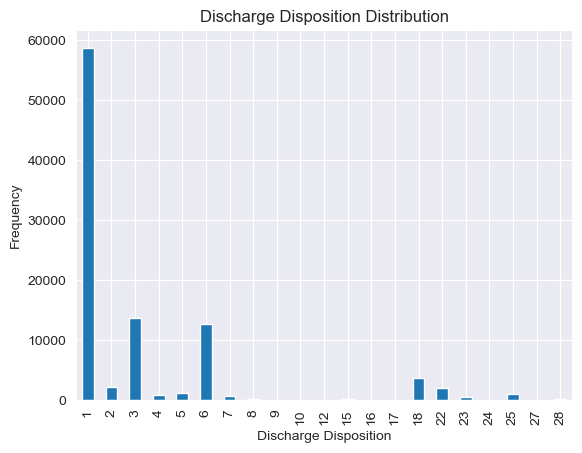

In [30]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'hospD' is your pandas DataFrame and it's already been defined

# Rename the column
hospD.rename(columns={'discharge_disposition_id': 'discharge_disposition'}, inplace=True)

# Plot the distribution of 'discharge_disposition' values as a bar plot
hospD['discharge_disposition'].value_counts().sort_index().plot(kind='bar', title='Discharge Disposition Distribution')

# Customize the plot
plt.xlabel('Discharge Disposition')
plt.ylabel('Frequency')
plt.show()


In [31]:
import matplotlib.pyplot as plt

# Assuming 'hospD' is your pandas DataFrame and it's already been defined

# Check the unique values in 'discharge_disposition' to ensure the categories are correct
print(hospD['discharge_disposition'].unique())



[25  1  3  6  2  5  7 10  4 18  8 12 16 17 22 23  9 15 24 28 27]


In [32]:
# Check the unique values in 'discharge_disposition'
unique_values = hospD['discharge_disposition'].unique()
print("Unique values in 'discharge_disposition':", unique_values)

# Check the data type of 'discharge_disposition'
data_type = hospD['discharge_disposition'].dtype
print("Data type of 'discharge_disposition':", data_type)


Unique values in 'discharge_disposition': [25  1  3  6  2  5  7 10  4 18  8 12 16 17 22 23  9 15 24 28 27]
Data type of 'discharge_disposition': int64


In [33]:
# Convert 'discharge_disposition' to a categorical type
hospD['discharge_disposition'] = hospD['discharge_disposition'].astype('str')

# Check the new data type of 'discharge_disposition'
print("New data type of 'discharge_disposition':", hospD['discharge_disposition'].dtype)


New data type of 'discharge_disposition': object


In [34]:
unique_values = hospD['discharge_disposition'].unique()

In [35]:
unique_values

array(['25', '1', '3', '6', '2', '5', '7', '10', '4', '18', '8', '12',
       '16', '17', '22', '23', '9', '15', '24', '28', '27'], dtype=object)

In [36]:
# Update 'discharge_disposition' to 'HOME' if it is '1', else 'OTHER'
hospD['discharge_disposition'] = hospD['discharge_disposition'].apply(lambda x: 'HOME' if x == '1' else 'OTHER')

# Convert 'discharge_disposition' to a categorical type
hospD['discharge_disposition'] = hospD['discharge_disposition'].astype('category')

# Verify the changes
print(hospD['discharge_disposition'].unique())

# Now the 'discharge_disposition' column should contain only 'HOME' or 'OTHER'


['OTHER', 'HOME']
Categories (2, object): ['HOME', 'OTHER']


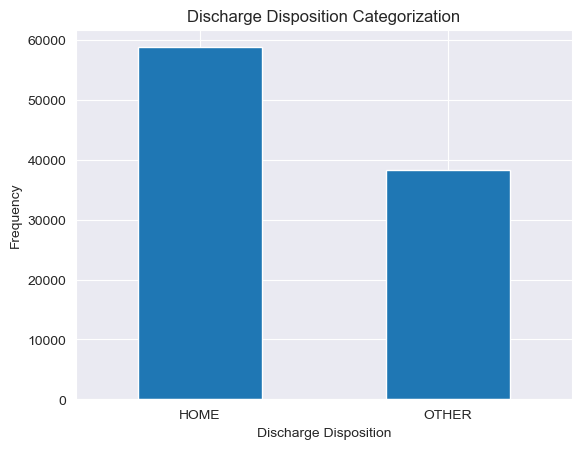

In [37]:
import matplotlib.pyplot as plt

# Plot the distribution of 'discharge_disposition' categories as a bar plot
hospD['discharge_disposition'].value_counts().plot(kind='bar', title='Discharge Disposition Categorization')

# Customize the plot
plt.xlabel('Discharge Disposition')
plt.ylabel('Frequency')
plt.xticks(rotation=0)  # Adjust if necessary for better label visibility
plt.show()


In [38]:
import pandas as pd
import numpy as np

# Assuming hospD is your DataFrame and diag_1 is the column with diagnostic codes
hospD['diag_1'] = hospD['diag_1'].astype(str)

# Function to safely convert to float and then to int, returning NaN if conversion fails
def safe_float_to_int(x):
    try:
        return int(float(x))
    except ValueError:
        return np.nan

# Applying the safe conversion function to diag_1
hospD['diag_1_int'] = hospD['diag_1'].apply(safe_float_to_int)

# Define conditions
conditions = [
    (hospD['diag_1'].str.startswith('V')) | (hospD['diag_1'].str.startswith('E')),
    (hospD['diag_1'].str.contains('250')),
    ((~hospD['diag_1_int'].isna()) & (hospD['diag_1_int'] >= 390) & (hospD['diag_1_int'] <= 459)) | (hospD['diag_1'] == '785'),
    ((~hospD['diag_1_int'].isna()) & (hospD['diag_1_int'] >= 460) & (hospD['diag_1_int'] <= 519)) | (hospD['diag_1'] == '786'),
    ((~hospD['diag_1_int'].isna()) & (hospD['diag_1_int'] >= 520) & (hospD['diag_1_int'] <= 579)) | (hospD['diag_1'] == '787'),
    ((~hospD['diag_1_int'].isna()) & (hospD['diag_1_int'] >= 580) & (hospD['diag_1_int'] <= 629)) | (hospD['diag_1'] == '788'),
    ((~hospD['diag_1_int'].isna()) & (hospD['diag_1_int'] >= 140) & (hospD['diag_1_int'] <= 239)),
    ((~hospD['diag_1_int'].isna()) & (hospD['diag_1_int'] >= 710) & (hospD['diag_1_int'] <= 739)),
    ((~hospD['diag_1_int'].isna()) & (hospD['diag_1_int'] >= 800) & (hospD['diag_1_int'] <= 999))
]

# Define choices
choices = [
    'Other', 'Diabetes', 'Circulatory', 'Respiratory', 'Digestive', 
    'Genitourinary', 'Neoplasms', 'Musculoskeletal', 'Injury'
]

# Default choice
default = 'Other'

# Use numpy.select to assign new column based on conditions
hospD['primary_diagnosis'] = np.select(conditions, choices, default=default)

# Optionally, you can drop the intermediate 'diag_1_int' column if it's no longer needed
hospD.drop('diag_1_int', axis=1, inplace=True)


In [39]:
import pandas as pd

# Assuming hospD is your DataFrame and primary_diagnosis is the column of interest

# Convert primary_diagnosis to a categorical data type
hospD['primary_diagnosis'] = pd.Categorical(hospD['primary_diagnosis'])

# Generate a frequency table
frequency_table = hospD['primary_diagnosis'].value_counts()

# Display the frequency table
print(frequency_table)

primary_diagnosis
Circulatory        29011
Other              17354
Respiratory        13626
Digestive           9155
Diabetes            8472
Injury              6702
Genitourinary       4912
Musculoskeletal     4804
Neoplasms           3054
Name: count, dtype: int64


In [40]:
hospD.drop('diag_1', axis=1, inplace=True)

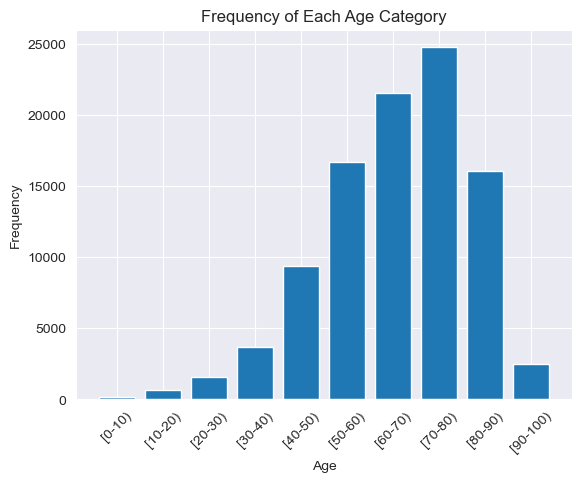

In [41]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming hospD is your DataFrame and 'age' is the column you want to plot

# Calculate the frequency of each age category
age_counts = hospD['age'].value_counts()

# Sort the index if you want the bars in order (optional, depending on your data)
age_counts = age_counts.sort_index()

# Create a bar plot
plt.bar(age_counts.index, age_counts.values)

# Adding labels and title for clarity
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Frequency of Each Age Category')

# Display the plot
plt.xticks(rotation=45)  # Rotate labels to avoid overlap, adjust angle as needed
plt.show()

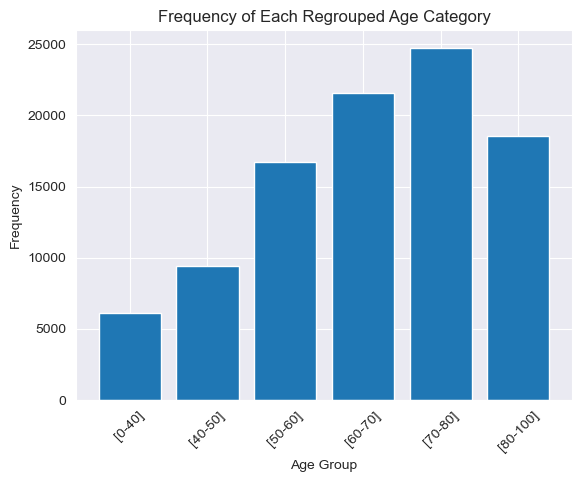

In [42]:
import pandas as pd
import matplotlib.pyplot as plt

# Function to regroup ages
def regroup_age(age):
    if age in ["[0-10)", "[10-20)", "[20-30)", "[30-40)"]:
        return "[0-40]"
    elif age in ["[80-90)", "[90-100)"]:
        return "[80-100]"
    elif age in "[40-50)":
        return "[40-50]"
    elif age in "[50-60)":
        return "[50-60]"
    elif age in "[60-70)":
        return "[60-70]"
    else:
        return "[70-80]"

# Apply the function to the 'age' column
hospD['age'] = hospD['age'].apply(regroup_age)

# Calculate the frequency of each age group
age_group_counts = hospD['age'].value_counts()

# Sort the index if you want the bars in order (optional, depending on your data)
age_group_counts = age_group_counts.sort_index()

# Create a bar plot
plt.bar(age_group_counts.index, age_group_counts.values)

# Adding labels and title for clarity
plt.xlabel('Age Group')
plt.ylabel('Frequency')
plt.title('Frequency of Each Regrouped Age Category')

# Display the plot
plt.xticks(rotation=45)  # Rotate labels to avoid overlap, adjust angle as needed
plt.show()


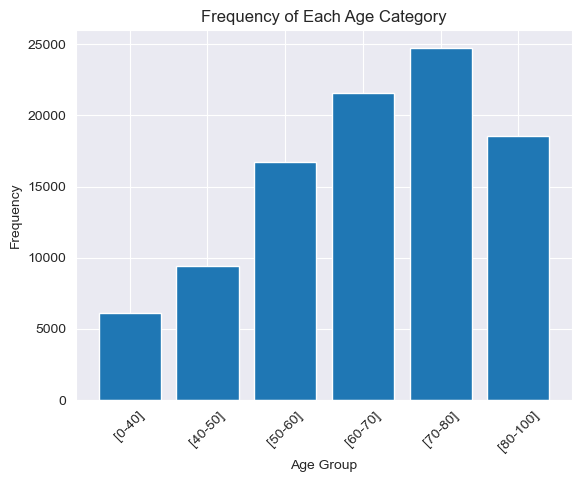

In [43]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert the 'age' column to a categorical data type
hospD['age'] = hospD['age'].astype('category')

# Calculate the frequency of each age group (pandas automatically sorts categorical data)
age_group_counts = hospD['age'].value_counts().sort_index()

# Create a bar plot
plt.bar(age_group_counts.index, age_group_counts.values)

# Adding labels and title for clarity
plt.xlabel('Age Group')
plt.ylabel('Frequency')
plt.title('Frequency of Each Age Category')

# Display the plot
plt.xticks(rotation=45)  # Rotate labels to avoid overlap, adjust angle as needed
plt.show()


In [44]:
import pandas as pd

# Assuming hospD is your DataFrame

# Rename the 17th column to 'HbA1c'
hospD.columns.values[16] = 'HbA1c'

# List of columns you intend to remove
columns_to_remove = [
    'repaglinide', 'nateglinide', 'chlorpropamide', 'acetohexamide',
    'tolbutamide', 'acarbose', 'miglitol', 'troglitazone', 'tolazamide',
    'glyburide.metformin', 'glipizide.metformin', 'glimepiride.pioglitazone',
    'metformin.rosiglitazone', 'metformin.pioglitazone'
]

# Filter the list to include only columns that exist in hospD
columns_to_remove = [col for col in columns_to_remove if col in hospD.columns]

# Remove the specified columns
hospD.drop(columns=columns_to_remove, inplace=True)


In [45]:
# Get the dimensions of the DataFrame
dimensions = hospD.shape

# Print the dimensions
print("Number of rows:", dimensions[0])
print("Number of columns:", dimensions[1])


Number of rows: 97090
Number of columns: 36


In [46]:
import pandas as pd

# Categorize 'readmitted' column: '1' for patients readmitted within 30 days, '0' otherwise
hospD['readmitted'] = hospD['readmitted'].apply(lambda x: '1' if x == '<30' else '0')

# Convert 'readmitted' to a categorical type
hospD['readmitted'] = hospD['readmitted'].astype('category')

# Check the levels (categories) of the 'readmitted' column
print(hospD['readmitted'].cat.categories)

Index(['0', '1'], dtype='object')


In [47]:
hospD = hospD.drop_duplicates(subset=['patient_nbr'])

# Remove the 'patient_nbr' column
hospD = hospD.drop(columns=['patient_nbr'])

# Get the dimensions of the DataFrame
dimensions = hospD.shape

# Print the dimensions
print("Number of rows:", dimensions[0])
print("Number of columns:", dimensions[1])


Number of rows: 68158
Number of columns: 35


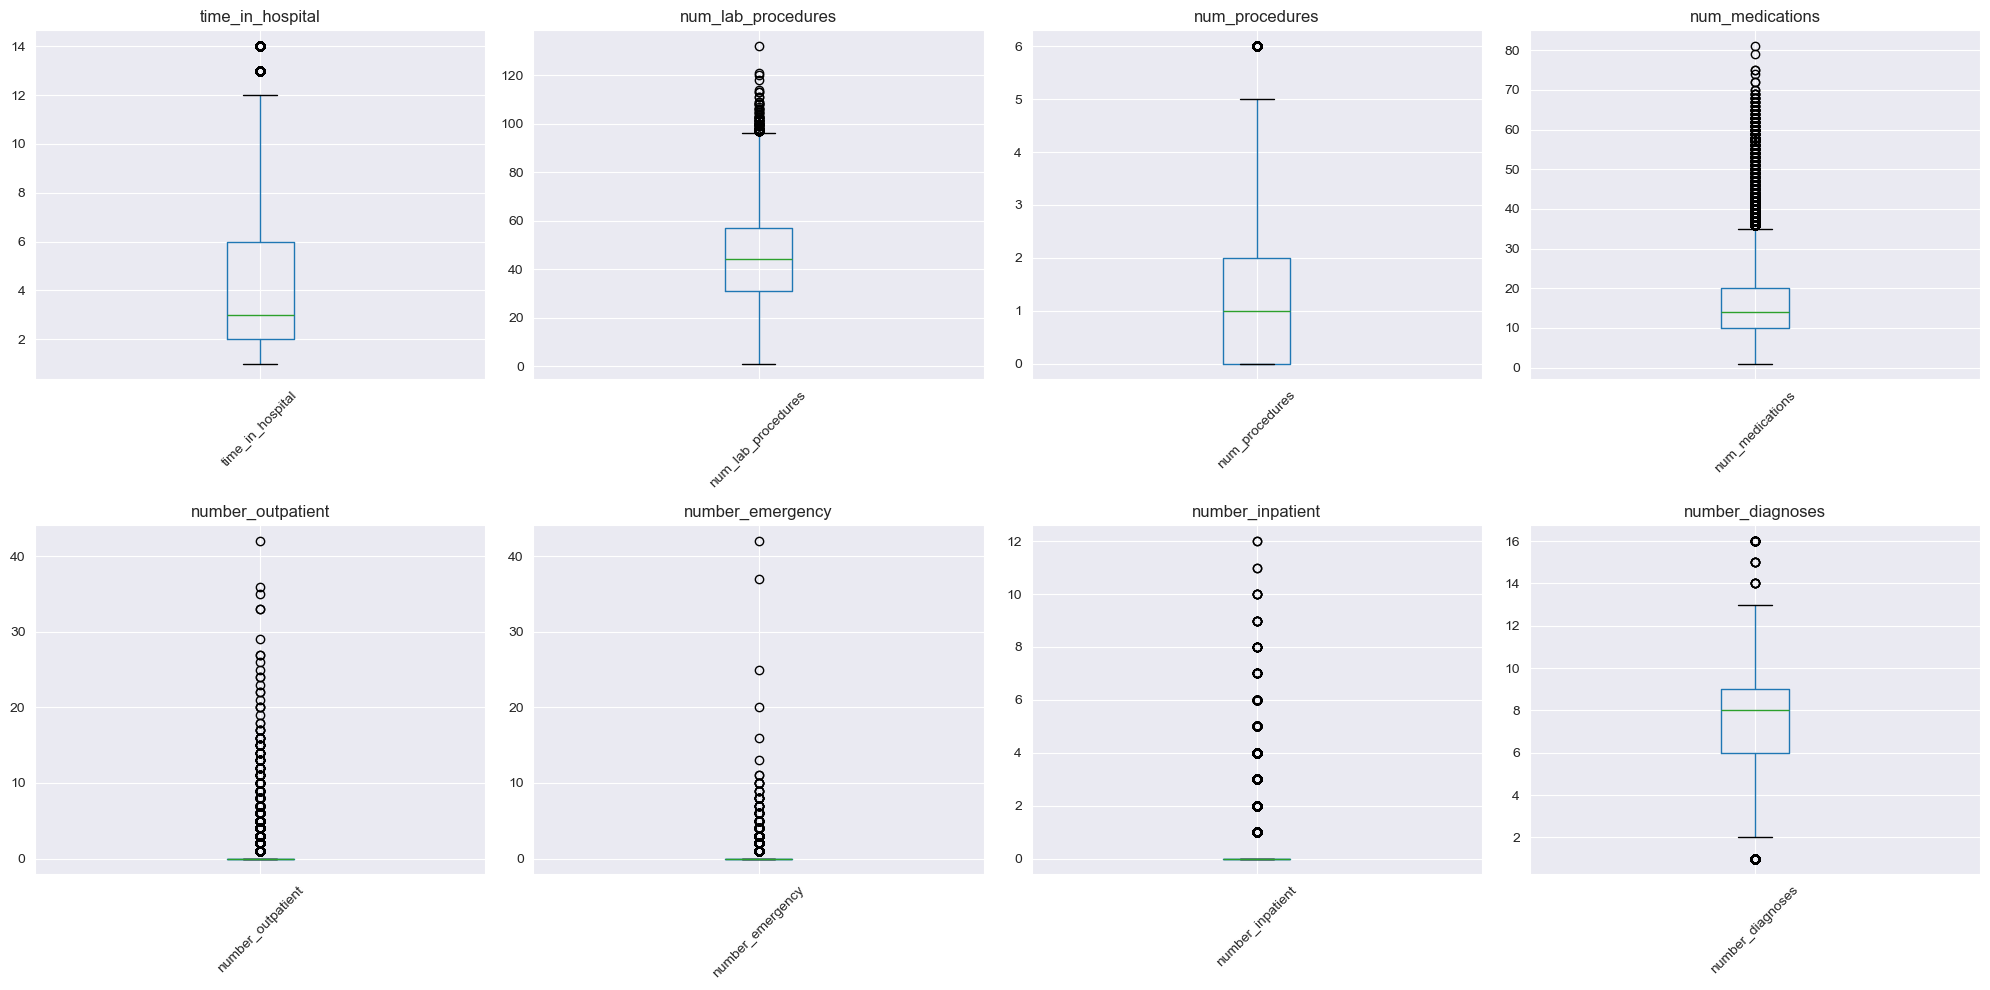

In [48]:
import matplotlib.pyplot as plt

# Setting up the layout for the plots
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(20, 10))  # figsize is adjustable based on your screen and preferences

# List of columns to plot
columns_to_plot = [
    'time_in_hospital', 'num_lab_procedures', 'num_procedures', 'num_medications',
    'number_outpatient', 'number_emergency', 'number_inpatient', 'number_diagnoses'
]

# Loop through the list of columns and create a boxplot for each
for i, col in enumerate(columns_to_plot):
    # Determine the subplot's row and column indices
    row_idx = i // 4  # Integer division to determine row index
    col_idx = i % 4   # Remainder to determine column index
    
    # Create the boxplot
    hospD.boxplot(column=[col], ax=axes[row_idx, col_idx])
    axes[row_idx, col_idx].set_title(col)
    axes[row_idx, col_idx].set_xticklabels([col], rotation=45)  # Rotate x-axis labels for better readability

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()

In [49]:
# Remove the specified columns
hospD = hospD.drop(columns=['number_emergency', 'number_inpatient', 'number_outpatient'])

# Get the dimensions of the DataFrame
dimensions = hospD.shape

# Print the dimensions
print("Number of rows:", dimensions[0])
print("Number of columns:", dimensions[1])

Number of rows: 68158
Number of columns: 32


In [50]:
import pandas as pd

def remove_outliers(df):
    clean_df = pd.DataFrame()
    for column in df.select_dtypes(include=['int64', 'float64']).columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Filter out outliers and retain only valid rows for each column
        filtered_df = df.loc[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
        
        # If clean_df is empty, initialize it with filtered_df
        if clean_df.empty:
            clean_df = filtered_df
        else:
            # Retain only rows present in both dataframes (intersection)
            clean_df = pd.merge(clean_df, filtered_df, how='inner')
    
    return clean_df

# Apply the function to remove outliers from hospD
hospD_clean = remove_outliers(hospD)

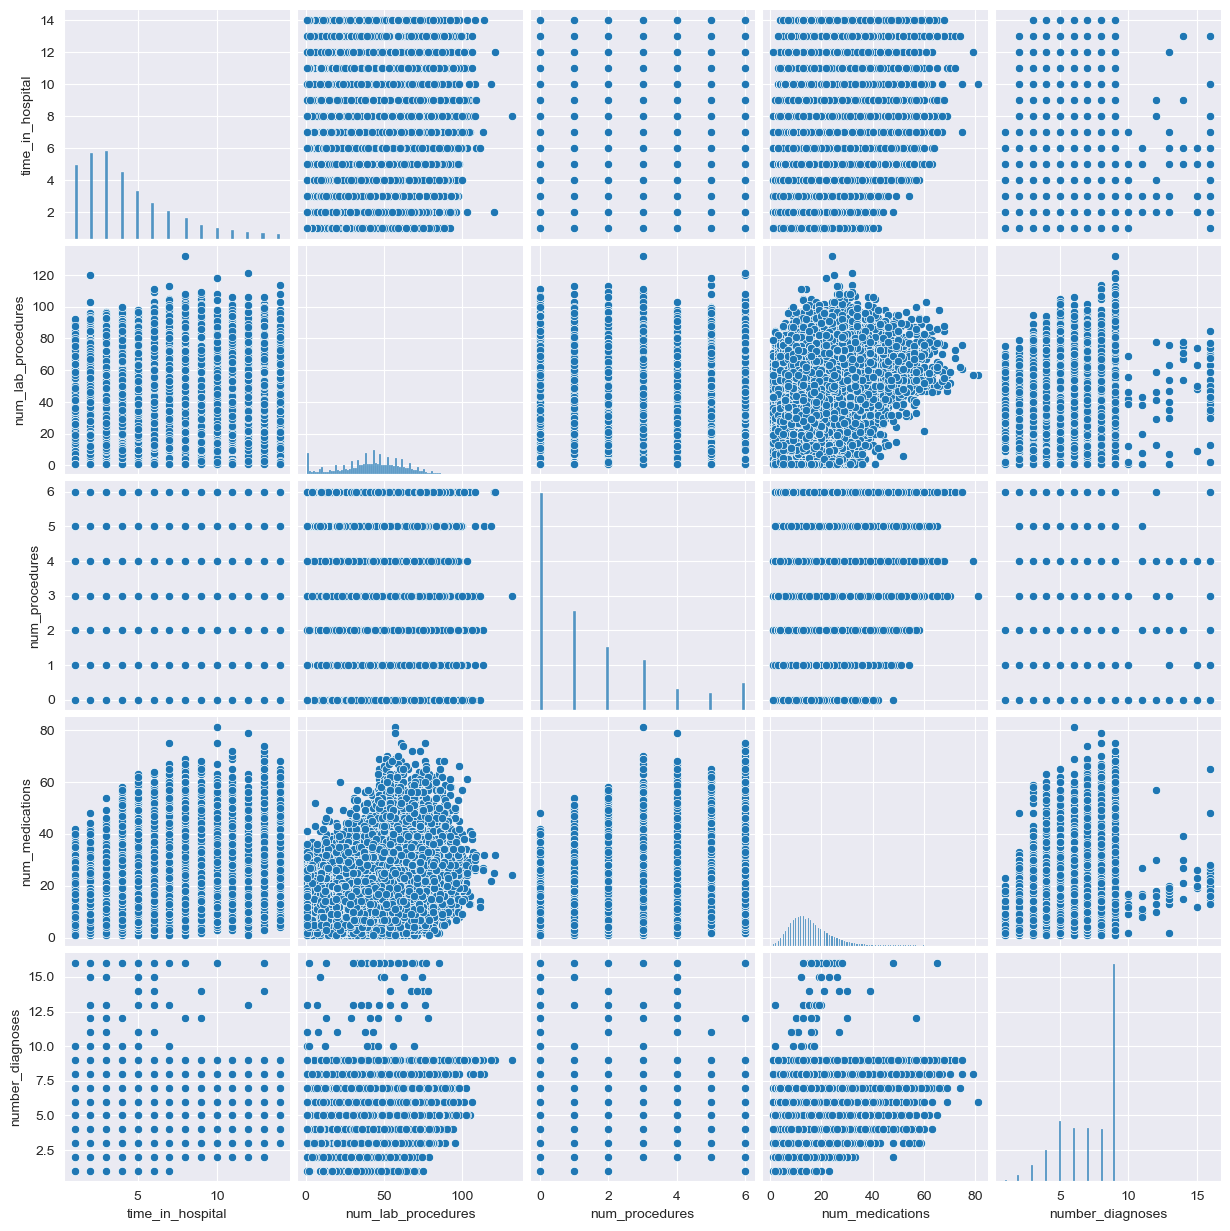

In [51]:
import seaborn as sns
import matplotlib.pyplot as plt

# Selecting the columns for the pair plot
columns = ["time_in_hospital", "num_lab_procedures", "num_procedures", "num_medications", "number_diagnoses"]

# Creating the pair plot
sns.pairplot(hospD[columns])

# Displaying the plot
plt.show()


In [52]:
# Get the dimensions of the DataFrame
dimensions = hospD.shape
print("Dimensions of hospD:", dimensions)

# Create a frequency table for the 'readmitted' column
readmitted_freq = hospD['readmitted'].value_counts()
print("\nFrequency table for 'readmitted':\n", readmitted_freq)


Dimensions of hospD: (68158, 32)

Frequency table for 'readmitted':
 readmitted
0    62001
1     6157
Name: count, dtype: int64


In [53]:
import numpy as np
from sklearn.model_selection import train_test_split

# Set the random seed for reproducibility
np.random.seed(100)

# Splitting the dataset into training and testing sets
X = hospD.drop('readmitted', axis=1)  # Independent variables
y = hospD['readmitted']  # Dependent variable

# Perform the split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=100)

# Create a DataFrame for the training set to use pandas functionalities
training = X_train.copy()
training['readmitted'] = y_train

# Check the distribution of the dependent variable in the training set
readmitted_freq_train = training['readmitted'].value_counts()
print("Frequency table for 'readmitted' in the training set:\n", readmitted_freq_train)


Frequency table for 'readmitted' in the training set:
 readmitted
0    49600
1     4926
Name: count, dtype: int64


In [54]:
from sklearn.preprocessing import OneHotEncoder
from imblearn.over_sampling import SMOTE
from sklearn.compose import ColumnTransformer
from imblearn.pipeline import Pipeline  # Import Pipeline from imblearn

# Identify categorical columns (you might need to adjust this based on your actual data)
categorical_cols = X_train.select_dtypes(include=['object', 'category']).columns

# Define the preprocessing for categorical columns (one-hot encoding)
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ])

# Define the imblearn pipeline that first transforms the data and then applies SMOTE
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('smote', SMOTE(random_state=100))])

# Apply the pipeline to the training data
X_resampled, y_resampled = pipeline.fit_resample(X_train, y_train)



In [55]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline  # Import the imbalanced-learn version of Pipeline

# Assuming hospD is your DataFrame
X = hospD.drop('readmitted', axis=1)  # Independent variables
y = hospD['readmitted']  # Dependent variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=100)

# Identifying categorical columns
categorical_cols = X_train.select_dtypes(include=['object', 'category']).columns.tolist()

# Defining the preprocessing for categorical columns (one-hot encoding)
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ])

# Define a grid of parameters to search
param_grid = {
    'classifier__C': [0.1, 1.0, 10],  # Regularization parameter
    # You can add more parameters here if needed
}

# Creating a logistic regression pipeline with imblearn's Pipeline
pipeline = ImbPipeline(steps=[
    ('preprocessor', preprocessor),
    ('smote', SMOTE(random_state=100)),
    ('classifier', LogisticRegression(solver='liblinear', random_state=100))
])

# Setting up the grid search with cross-validation
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy', verbose=1)

# Perform the grid search on the balanced dataset
grid_search.fit(X_train, y_train)

# Best model after grid search
best_model = grid_search.best_estimator_

# Print best parameters found by GridSearchCV
print("Best parameters:", grid_search.best_params_)


Fitting 5 folds for each of 3 candidates, totalling 15 fits
Best parameters: {'classifier__C': 0.1}


In [56]:
logit_pred_CV = grid_search.predict(X_test)

In [57]:
from sklearn.metrics import classification_report

# Print a detailed classification report
print(classification_report(y_test, logit_pred_CV))


              precision    recall  f1-score   support

           0       0.93      0.59      0.72     12401
           1       0.12      0.55      0.19      1231

    accuracy                           0.59     13632
   macro avg       0.52      0.57      0.46     13632
weighted avg       0.86      0.59      0.68     13632



In [58]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline

# Assuming hospD is your DataFrame
X = hospD.drop('readmitted', axis=1)  # Independent variables
y = hospD['readmitted']  # Dependent variable

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=100)

# Identifying categorical columns
categorical_cols = X_train.select_dtypes(include=['object', 'category']).columns.tolist()

# Defining the preprocessing for categorical columns (one-hot encoding)
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ])

# Creating an imbalanced-learn pipeline with SMOTE and a Decision Tree Classifier
pipeline = ImbPipeline(steps=[
    ('preprocessor', preprocessor),
    ('smote', SMOTE(random_state=100)),
    ('classifier', DecisionTreeClassifier(random_state=100))
])

# Define a grid of parameters to search (you can add more parameters and values)
param_grid = {
    'classifier__max_depth': [None, 10, 20, 30],  # Maximum depth of the tree
    'classifier__min_samples_leaf': [1, 2, 4]  # Minimum number of samples required to be at a leaf node
}

# Setup the grid search with cross-validation
grid_search_dt = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy', verbose=1)

# Perform the grid search on the training dataset
grid_search_dt.fit(X_train, y_train)

# Best model after grid search
best_dt_model = grid_search_dt.best_estimator_

# Print best parameters found by GridSearchCV
print("Best parameters for Decision Tree:", grid_search_dt.best_params_)


Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best parameters for Decision Tree: {'classifier__max_depth': None, 'classifier__min_samples_leaf': 2}


In [59]:
# Making predictions on the testing set
DT_pred_CV = grid_search_dt.predict(X_test)


In [60]:
from sklearn.metrics import classification_report

# Print a detailed classification report
print(classification_report(y_test, DT_pred_CV))


              precision    recall  f1-score   support

           0       0.91      0.90      0.90     12401
           1       0.11      0.13      0.12      1231

    accuracy                           0.83     13632
   macro avg       0.51      0.51      0.51     13632
weighted avg       0.84      0.83      0.83     13632

